In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score

In [47]:
datasets = {
    "CTGAN": pd.read_csv('synthetic_data_CTGANFinal.csv'),
    "TVAE": pd.read_csv('synthetic_data2_TVAEFinal.csv'),
    "Secondary": pd.read_csv('train_data_Final.csv')
}
test_data = pd.read_csv('test_data_Final.csv')

In [48]:
le = LabelEncoder()
scaler = StandardScaler()

In [49]:
def preprocess(df, test=False):
    df['class'] = le.fit_transform(df['class'])  
    y = df['class']
    X = df.drop(columns=['class'])
    
    # Standardize numerical features
    X = pd.get_dummies(X, drop_first=True)  
    X = scaler.fit_transform(X)
    return X, y

In [50]:
X_test, y_test = preprocess(test_data)

In [51]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

In [52]:
metrics = ['Accuracy', 'F1 Score']

In [53]:
results = {model_name: {} for model_name in models.keys()}


In [54]:
for model_name, model in models.items():
    for dataset_name, dataset in datasets.items():
        X_train, y_train = preprocess(dataset)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        # Store results
        results[model_name][dataset_name] = {
            'Accuracy': acc,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }

Results for Accuracy:

Random Forest:
CTGAN: 0.7355
TVAE: 0.9731
Secondary: 0.9998

Logistic Regression:
CTGAN: 0.7565
TVAE: 0.7459
Secondary: 0.7762

Naive Bayes:
CTGAN: 0.6706
TVAE: 0.7008
Secondary: 0.5015

LDA:
CTGAN: 0.7521
TVAE: 0.7526
Secondary: 0.7764


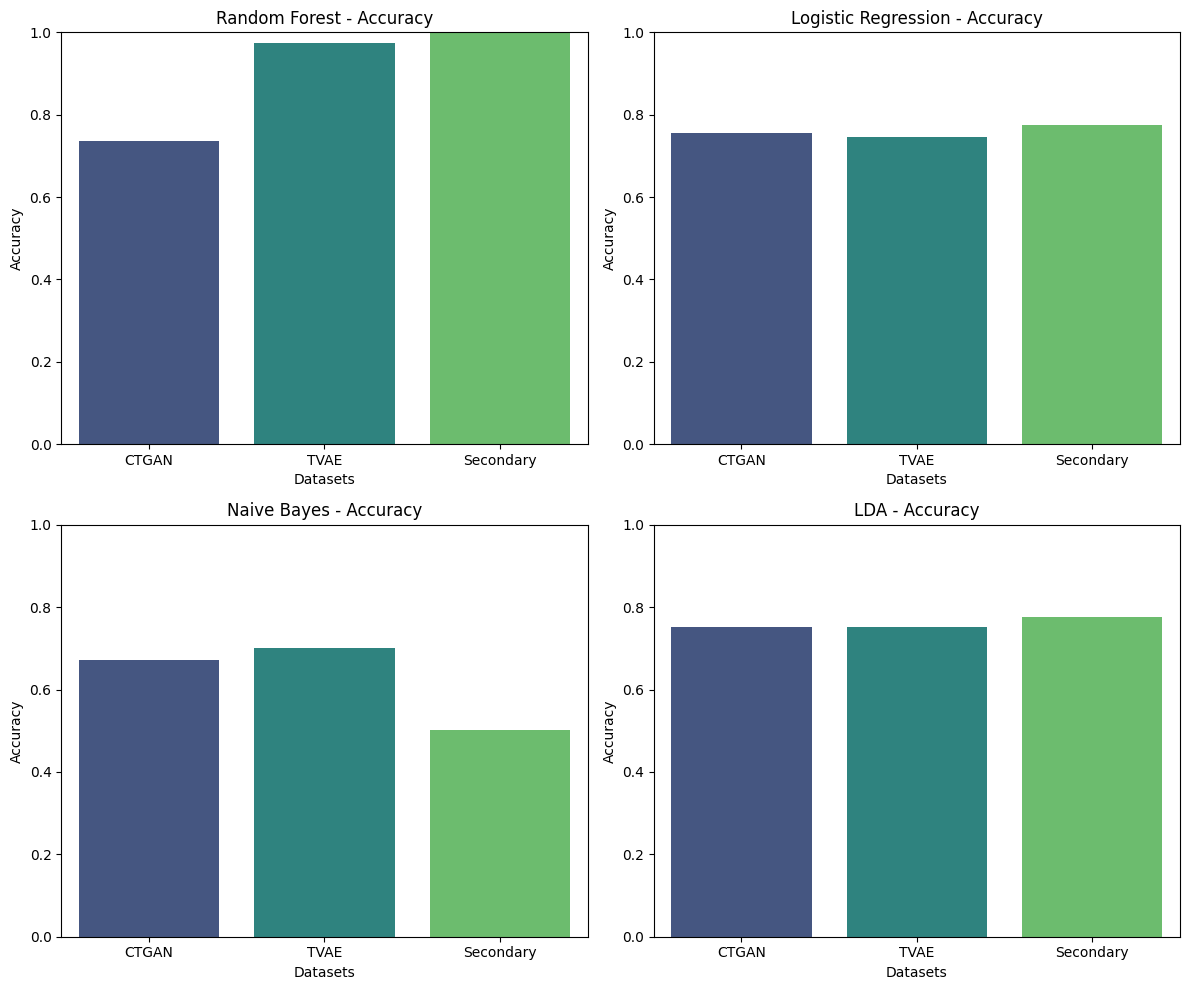

Results for F1 Score:

Random Forest:
CTGAN: 0.7620
TVAE: 0.9758
Secondary: 0.9999

Logistic Regression:
CTGAN: 0.7867
TVAE: 0.7735
Secondary: 0.7977

Naive Bayes:
CTGAN: 0.6716
TVAE: 0.6957
Secondary: 0.1837

LDA:
CTGAN: 0.7827
TVAE: 0.7813
Secondary: 0.7961


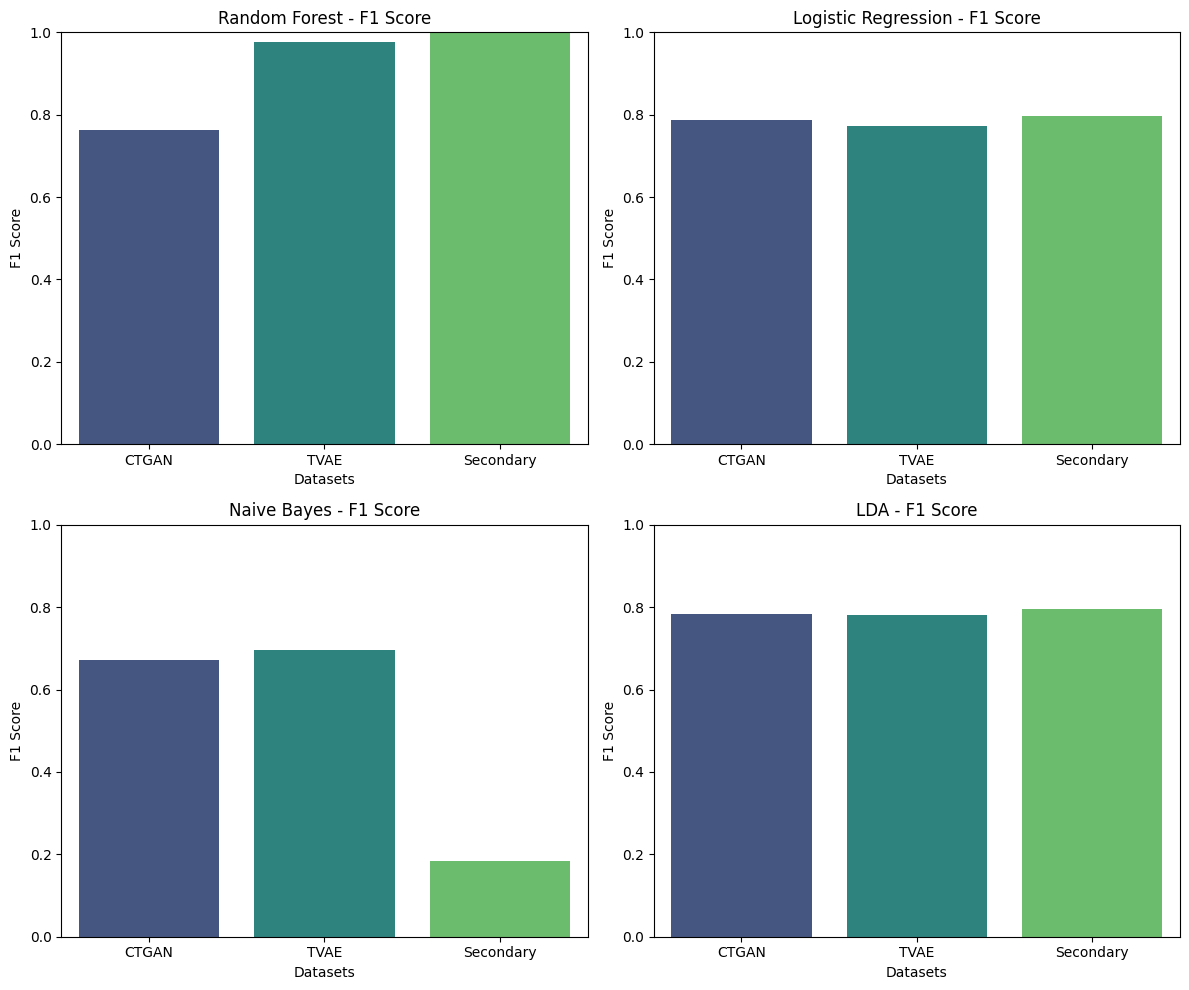

In [55]:
def plot_metrics_and_print_results(metric):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Print results in terminal
    print(f"Results for {metric}:")
    
    for idx, (model_name, dataset_metrics) in enumerate(results.items()):
        data = [dataset_metrics[ds][metric] for ds in datasets.keys()]
        
        # Print the results for the current model and metric
        print(f"\n{model_name}:")
        for ds, score in zip(datasets.keys(), data):
            print(f"{ds}: {score:.4f}")
        
        # Use hue with the 'x' variable and set legend=False
        sns.barplot(x=list(datasets.keys()), y=data, ax=axes[idx], hue=list(datasets.keys()), palette='viridis', legend=False)
        
        axes[idx].set_title(f'{model_name} - {metric}')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_ylabel(metric)
        axes[idx].set_xlabel('Datasets')
    
    plt.tight_layout()
    plt.show()

# Generate all bar plots for Accuracy and F1 Score, and print results
for metric in metrics:
    plot_metrics_and_print_results(metric)


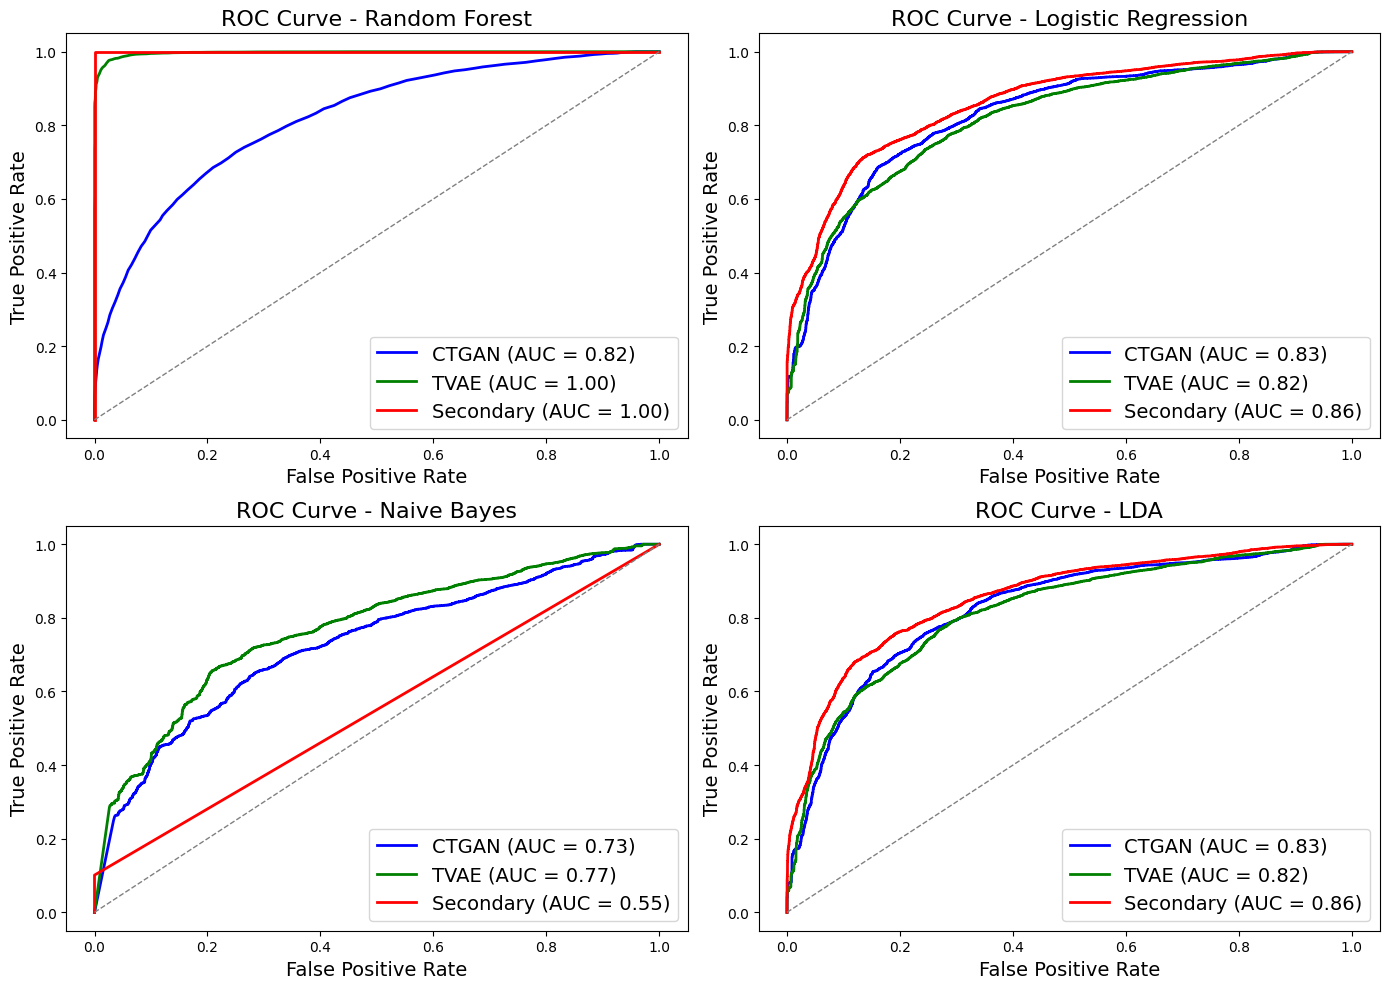

In [59]:
plt.figure(figsize=(14, 10))
colors = ['blue', 'green', 'red']
for model_idx, (model_name, model) in enumerate(models.items()):
    plt.subplot(2, 2, model_idx + 1)  # 2x2 grid for ROC curves
    for color_idx, (dataset_name, dataset) in enumerate(datasets.items()):
        X_train, y_train = preprocess(dataset)
        model.fit(X_train, y_train)
        
        # Get predicted probabilities for the positive class
        y_probs = model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[color_idx], lw=2, label=f'{dataset_name} (AUC = {roc_auc:.2f})')
    
    # Plot settings for each subplot
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal reference line
    plt.xlabel('False Positive Rate', fontsize= 14)
    plt.ylabel('True Positive Rate', fontsize= 14)
    plt.title(f'ROC Curve - {model_name}', fontsize= 16)
    plt.legend(loc='lower right', fontsize= 14)

# Final layout adjustments
plt.tight_layout()
plt.show()

In [38]:
# Merging TVAE with Secondary
merged_tvae = pd.concat([datasets["TVAE"], datasets["Secondary"]], ignore_index=True)

# Merging CTGAN with Secondary
merged_ctgan = pd.concat([datasets["CTGAN"], datasets["Secondary"]], ignore_index=True)

# Creating a dictionary for the merged datasets
all_datasets= {
    "Merged_TVAE": merged_tvae,
    "Merged_CTGAN": merged_ctgan,
    "Secondary": pd.read_csv('train_data_Final.csv')
}

# Check the shape of the merged datasets to ensure they were combined correctly
print("Merged TVAE shape:", all_datasets["Merged_TVAE"].shape)
print("Merged CTGAN shape:", all_datasets["Merged_CTGAN"].shape)



Merged TVAE shape: (97710, 16)
Merged CTGAN shape: (97710, 16)


In [39]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

In [40]:
results = {model_name: {} for model_name in models.keys()}

In [41]:
metrics = ["Accuracy", "F1 Score", "ROC AUC"]

In [42]:
for model_name, model in models.items():
    for dataset_name, dataset in all_datasets.items():
        X_train, y_train = preprocess(dataset)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        results[model_name][dataset_name] = {
            'Accuracy': acc,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }

Results for Accuracy:

Random Forest:
Merged_TVAE: 0.9993
Merged_CTGAN: 0.9983
Secondary: 0.9999

Logistic Regression:
Merged_TVAE: 0.7662
Merged_CTGAN: 0.7844
Secondary: 0.7762

Naive Bayes:
Merged_TVAE: 0.7079
Merged_CTGAN: 0.6795
Secondary: 0.5015

LDA:
Merged_TVAE: 0.7644
Merged_CTGAN: 0.7813
Secondary: 0.7764


C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

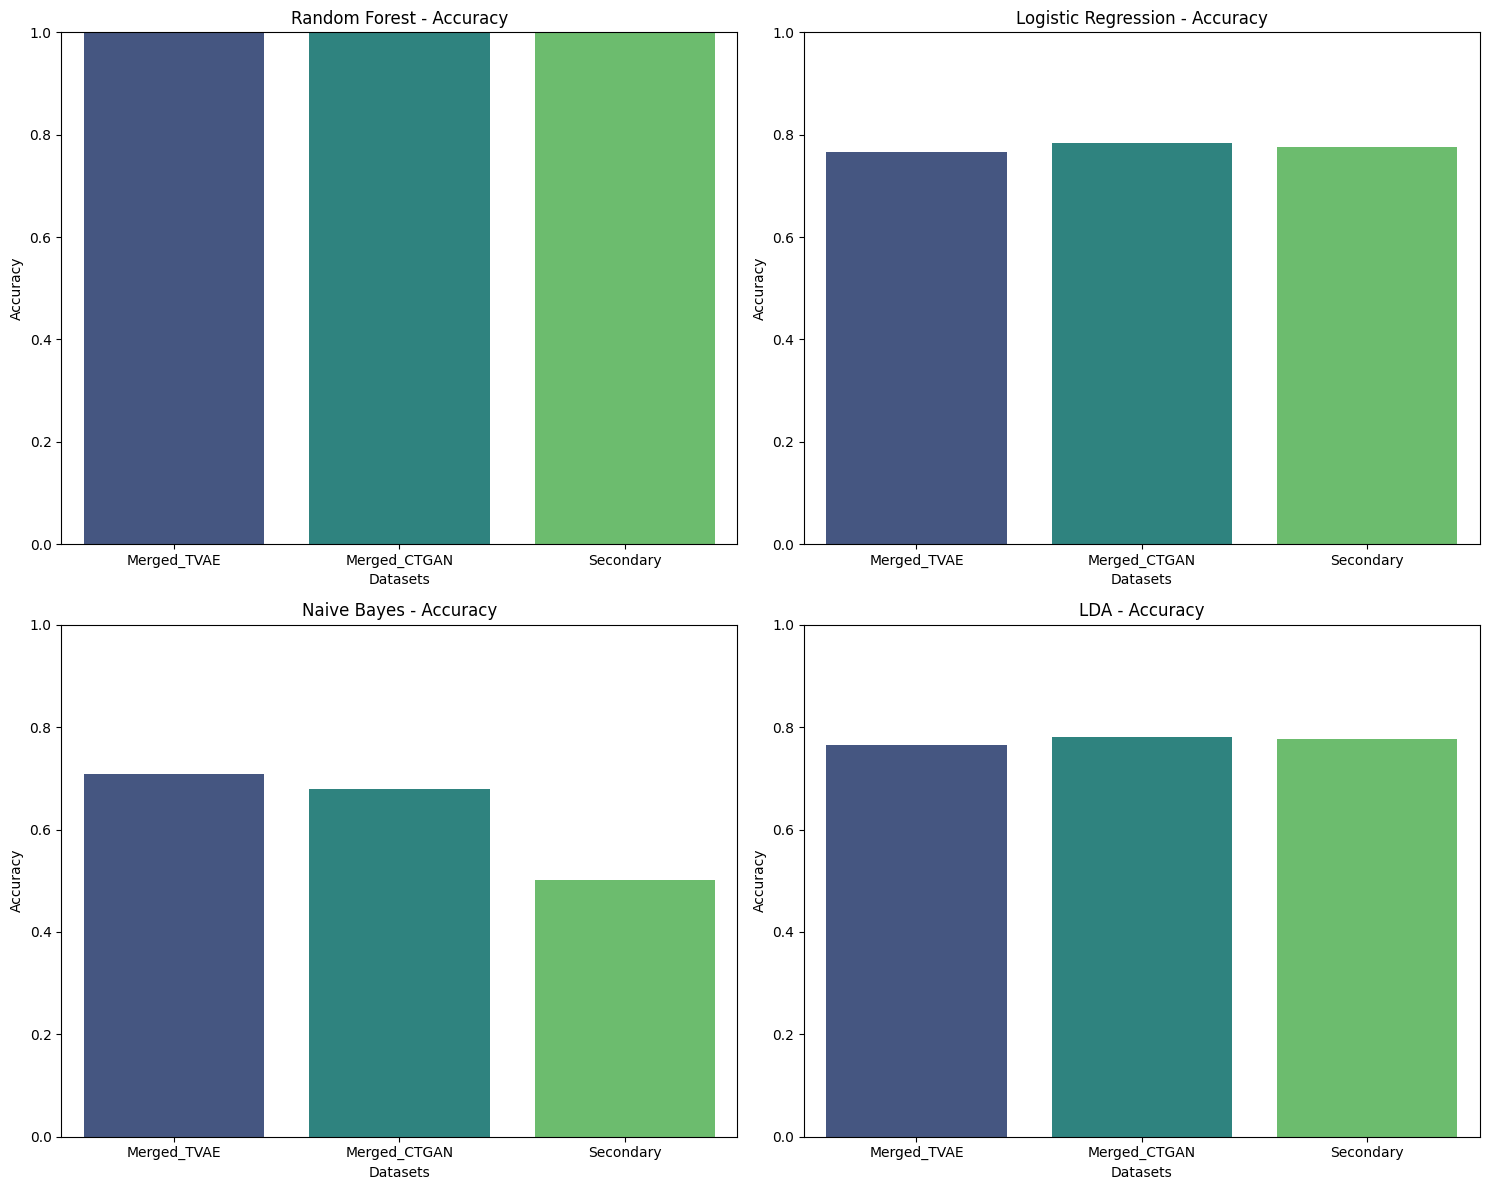

Results for F1 Score:

Random Forest:
Merged_TVAE: 0.9993
Merged_CTGAN: 0.9985
Secondary: 0.9999

Logistic Regression:
Merged_TVAE: 0.7880
Merged_CTGAN: 0.8057
Secondary: 0.7977

Naive Bayes:
Merged_TVAE: 0.6998
Merged_CTGAN: 0.6774
Secondary: 0.1837

LDA:
Merged_TVAE: 0.7869
Merged_CTGAN: 0.8031
Secondary: 0.7961


C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

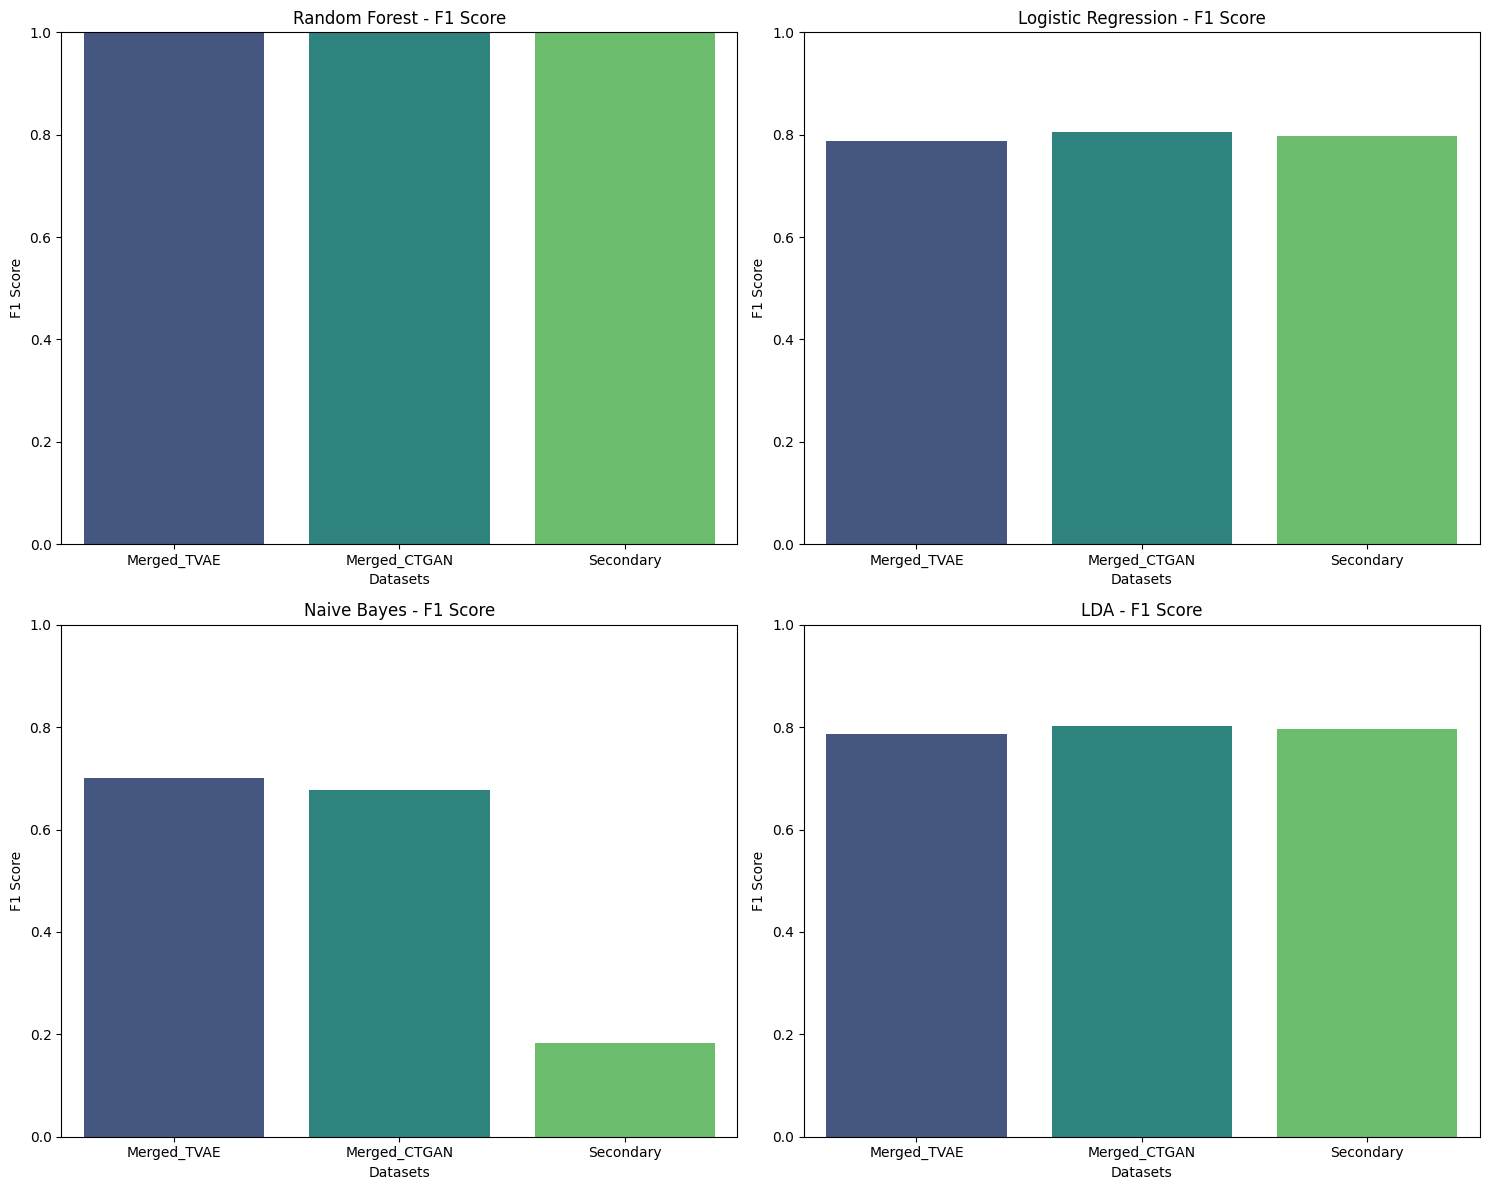

Results for ROC AUC:

Random Forest:
Merged_TVAE: 1.0000
Merged_CTGAN: 1.0000
Secondary: 1.0000

Logistic Regression:
Merged_TVAE: 0.8510
Merged_CTGAN: 0.8539
Secondary: 0.8608

Naive Bayes:
Merged_TVAE: 0.7768
Merged_CTGAN: 0.7533
Secondary: 0.5506

LDA:
Merged_TVAE: 0.8464
Merged_CTGAN: 0.8503
Secondary: 0.8555


C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kashFrom2077\AppData\Local\Temp\ipykernel_16904\2206299035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

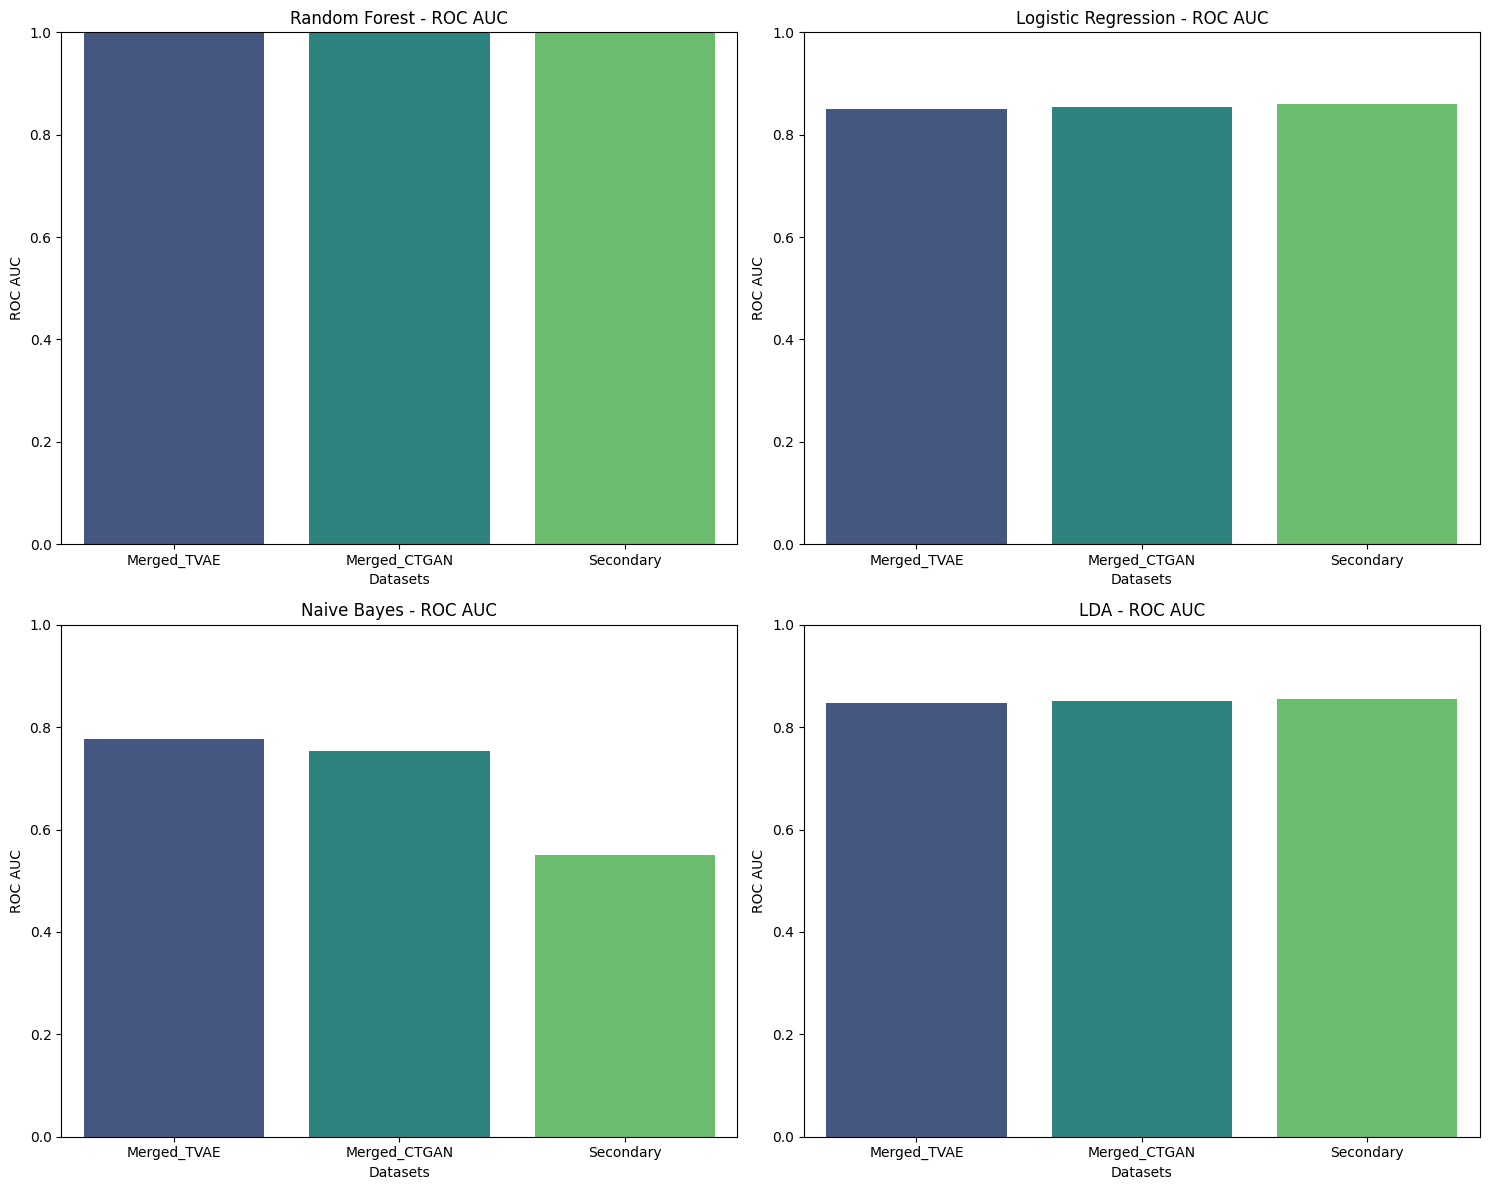

In [43]:
def plot_metrics_and_print_results(metric):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    print(f"Results for {metric}:")
    
    for idx, (model_name, dataset_metrics) in enumerate(results.items()):
        data = [dataset_metrics[ds][metric] for ds in all_datasets.keys()]
        
        print(f"\n{model_name}:")
        for ds, score in zip(all_datasets.keys(), data):
            print(f"{ds}: {score:.4f}")
        
        # Create bar plot
        sns.barplot(
            x=list(all_datasets.keys()), 
            y=data, 
            ax=axes[idx], 
            palette='viridis'
        )
        
        axes[idx].set_title(f'{model_name} - {metric}')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_ylabel(metric)
        axes[idx].set_xlabel('Datasets')
    
    plt.tight_layout()
    plt.show()

for metric in metrics:
    plot_metrics_and_print_results(metric)


HpyerParameter tuning of the best i.e. Random Forest and interpreting results with SHAP

In [151]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

datasets = {
    "CTGAN": pd.read_csv('synthetic_data_CTGANFinal.csv'),
    "TVAE": pd.read_csv('synthetic_data2_TVAEFinal.csv'),
    "Secondary": pd.read_csv('train_data_Final.csv')
}
test_data = pd.read_csv('test_data_Final.csv')



In [152]:
le = LabelEncoder()
scaler = StandardScaler()

In [153]:
def preprocess(df, test=False):
    
    df['class'] = le.fit_transform(df['class']) 
    
    y = df['class']
    X = df.drop(columns=['class'])
    
    categorical_columns = X.select_dtypes(include=['object']).columns  
     
    for col in categorical_columns:
        X[col] = le.fit_transform(X[col])  
   
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
    
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

    return X, y

In [155]:
X_test, y_test = preprocess(test_data)

X_train, y_train = preprocess(datasets['Secondary'])


In [156]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [30, 70, 100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_rf_random = random_search.best_estimator_

In [160]:
best_rf_random = random_search.best_estimator_

print("Best parameters from RandomizedSearchCV:")
print(random_search.best_params_)

Best parameters from RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


In [158]:


param_grid = {
    'n_estimators': [max(1, best_rf_random.n_estimators - 20), best_rf_random.n_estimators, best_rf_random.n_estimators + 20],
    'max_depth': [best_rf_random.max_depth, best_rf_random.max_depth + 10, best_rf_random.max_depth + 20] if best_rf_random.max_depth is not None else [None, 10, 20],
    'min_samples_split': [best_rf_random.min_samples_split, best_rf_random.min_samples_split + 2],
    'min_samples_leaf': [best_rf_random.min_samples_leaf, best_rf_random.min_samples_leaf + 1],
    'bootstrap': [best_rf_random.bootstrap]
}

grid_search = GridSearchCV(estimator=best_rf_random, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_grid = grid_search.best_estimator_

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)


Best parameters from GridSearchCV:
{'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


In [172]:
y_pred = best_rf_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf_grid.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print("Best Random Forest Model Evaluation (After GridSearchCV):")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Best Random Forest Model Evaluation (After GridSearchCV):
Accuracy: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Precision: 1.0000
Recall: 1.0000


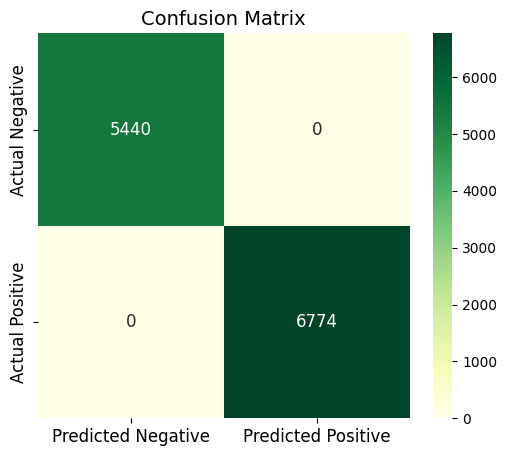

In [183]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], annot_kws={"size": 12} )
plt.title('Confusion Matrix', fontsize=14)  # Title font size
plt.xticks(fontsize=12)  # X-tick labels font size
plt.yticks(fontsize=12)  # Y-tick labels font size
plt.show()


In [72]:
!pip install lime shap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.2 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/12.9 MB 1.2 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.9 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.3/12.9 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.9 MB 1.3 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.1 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.9 MB 917.5 kB/s eta 0:00:12
   ------ --------------------------------- 2.1/12.9 MB 917.5 k

In [22]:
!pip install shap

In [184]:
import shap

In [185]:
explainer2 = shap.TreeExplainer(best_rf_grid)

In [186]:
exp =  explainer2(X_test)
print(type(exp))


<class 'shap._explanation.Explanation'>


In [187]:
exp.shape

(12214, 15, 2)

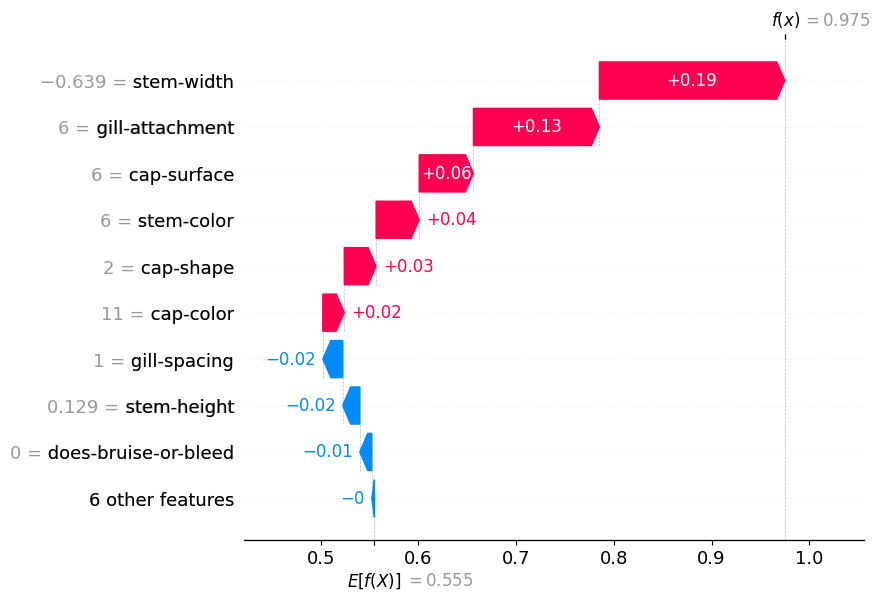

In [188]:
shap.plots.waterfall(exp[4,:,1])


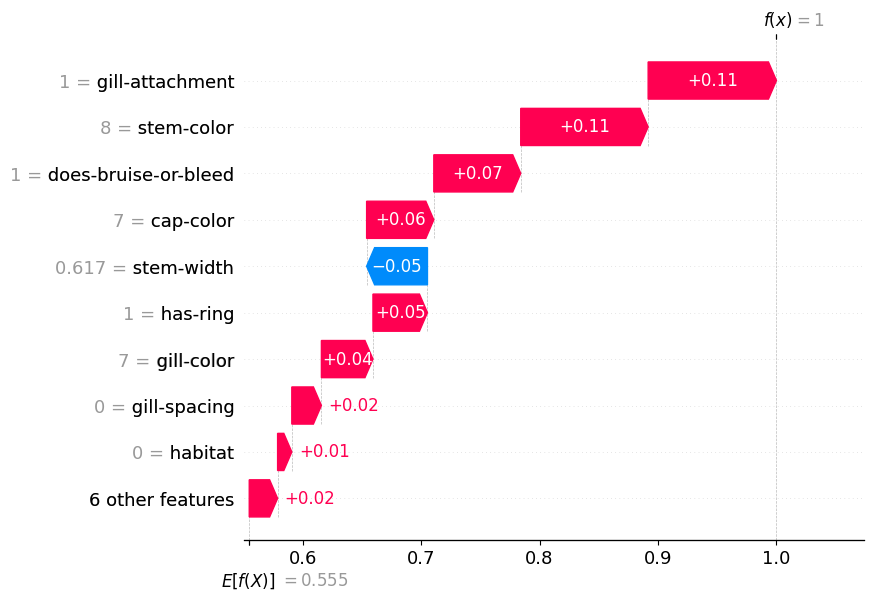

In [189]:
shap.plots.waterfall(exp[3,:,1])

In [190]:
shap_values = shap.TreeExplainer(best_rf_grid).shap_values(X_test)

type(shap_values)

numpy.ndarray

In [191]:
shap_values.shape

(12214, 15, 2)

In [192]:
feat_names = list(X_test.columns)


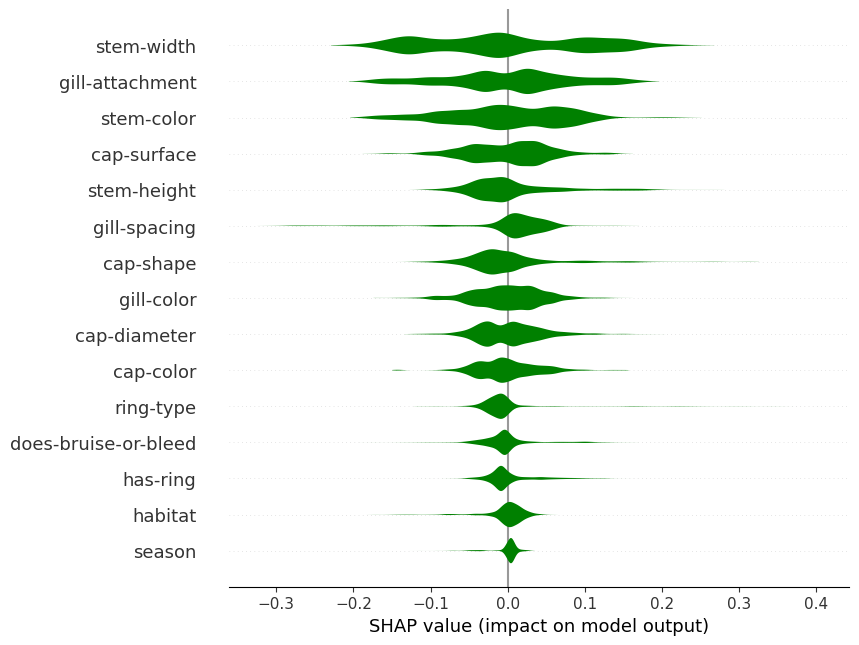

In [196]:
shap.plots.violin(shap_values[:,:,1],feature_names=feat_names, color="green")
